In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Task 4: Visualization

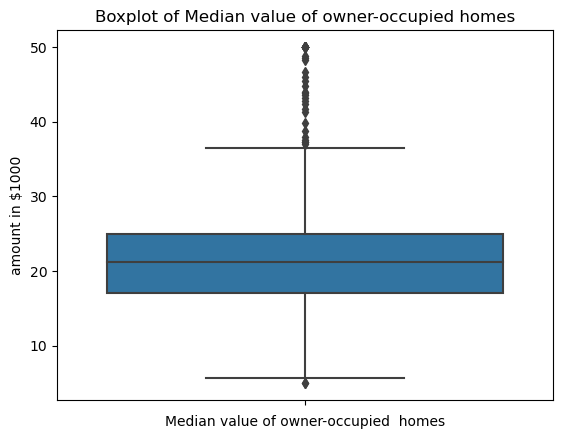

In [4]:
# "Median value of owner-occupied homes" - boxplot
ax = sns.boxplot(y= boston_df["MEDV"])
ax.set(xlabel='Median value of owner-occupied  homes', ylabel='amount in $1000')
ax.set(title = "Boxplot of Median value of owner-occupied homes")
plt.show()

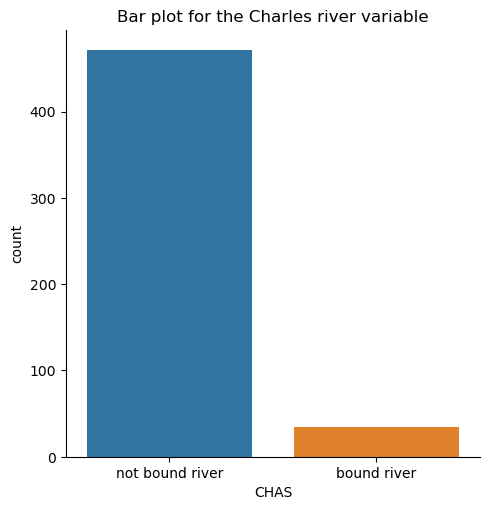

In [17]:
# bar plot for the Charles river variable
df1 = boston_df
df1.loc[df1.CHAS ==0, "CHAS"] = "not bound river"
df1.loc[df1.CHAS ==1, "CHAS"] = "bound river"
ax = sns.catplot(data= df1, x="CHAS", kind="count")
ax.set(title = "Bar plot for the Charles river variable")
plt.show()

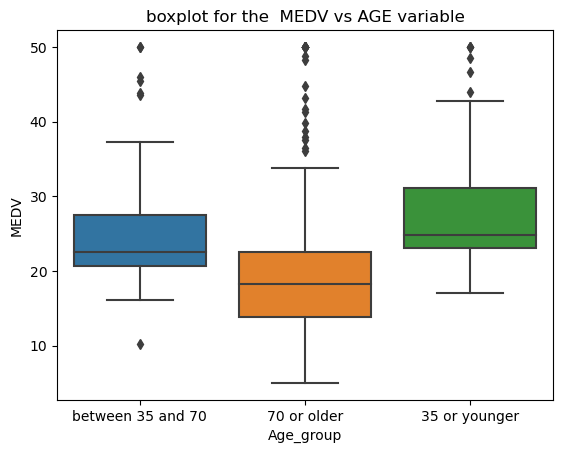

In [20]:
# Boxplot for the MEDV variable and Age variable
boston_df.loc[boston_df.AGE <= 35, "Age_group"] = "35 or younger"
boston_df.loc[(boston_df.AGE > 35) & (boston_df.AGE < 70), "Age_group"] = "between 35 and 70"
boston_df.loc[boston_df.AGE >= 70, "Age_group"] = "70 or older"

ax =  sns.boxplot(x = "Age_group", y  = "MEDV", data = boston_df)
ax.set(title = "boxplot for the  MEDV vs AGE variable")
plt.show()

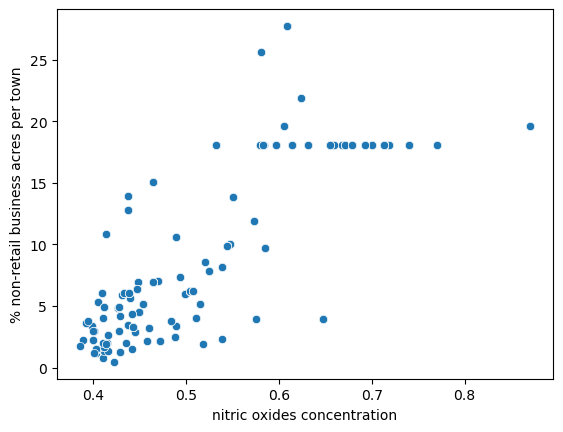

In [22]:
# Scatter plot between Nitric oxide concentration and INDUS

ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel = "nitric oxides concentration", ylabel = "% non-retail business acres per town")
plt.show()

Comment: NOX and INDUX are possitively correlated.

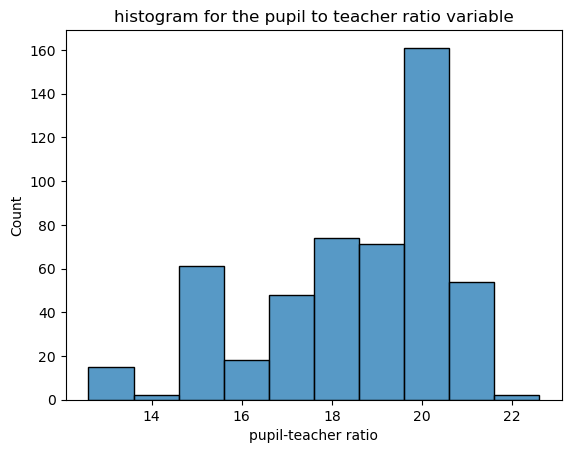

In [39]:
# Histogram for the pupil to teacher ratio variable: PTRATIO
ax = sns.histplot(x="PTRATIO", binwidth= 1, data = boston_df)
ax.set(xlabel = "pupil-teacher ratio", title = "histogram for the pupil to teacher ratio variable")
plt.show()


# Task 5: Hypothesis testing

**Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?**

H_0: median_nearChars = median_farChars

H_1: opposed to H_0

In [4]:
import scipy.stats

In [4]:
scipy.stats.ttest_ind(boston_df.loc[boston_df.CHAS ==0, "MEDV"], \
                                         boston_df.loc[boston_df.CHAS == 1, "MEDV"])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis ==> there is significance difference in median value of houses bounded by Charles river or not.

**Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Hypothesis: 

$H_0$:  $\mu_{before 1940} = \mu_{after 1940}$

$H_1$:  $\mu_{before 1940} \neq \mu_{after 1940}$

In [13]:
boston_df.loc[boston_df.AGE <= 82, "Age_group"] = "Before 1940"
boston_df.loc[boston_df.AGE > 82, "Age_group"] = "After 1940"

scipy.stats.f_oneway(boston_df.loc[boston_df.Age_group == 'Before 1940', "MEDV"], \
                                           boston_df.loc[boston_df.Age_group =='After 1940', "MEDV"])

F_onewayResult(statistic=68.19097395438456, pvalue=1.313562936560301e-15)

p_value < 0.05 --> Conclude that there is a significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940

**Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

$H_0$: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

$H_1$: not $ H_0$

In [15]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.7636514469209151, 7.913361061238693e-98)

$p-value < 0.05$. Conclude: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

We run linear regression for DIS ~ MEDV.

In [17]:
import statsmodels.api as sm
X = boston_df["DIS"]
X = sm.add_constant(X)
y = boston_df["MEDV"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        00:17:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Relation coefficiet is 1.0916, that means, more 1 unit of DIST, MEDV increases 1.0916 unit.